## Live University

## Teste de Hipótese 

Vamos importar as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as st
import matplotlib.pyplot as plt

### Antes de explorar o passo a passo...

#### Teste de hipótese usando o P valor

Além do procedimento explicado passo a passo, calculando o valor observado e comparando com os valores críticos, podemos analisar o <strong>valor p</strong> contra o nível de significância alfa para rejeitar ou aceitar a hipótese nula. 

Se o P valor for maior do que alfa, podemos aceitar a hipótese nula, caso contrário, se o P valor for menor do que alfa, podemos rejeitar a hipótese nula. 

No Python, como na maioria das aplicações, existem diversas maneiras de se lidar com o problema. Vamos aqui explorar duas maneiras de se extrair o P valor,

#### P Valor a partir do zscore


#### Computa o desvio padrão da amostra

    desvio_padrao_amostra = amostra.std()

#### Computa o zscore

    zscore = (H0 - media_amostra)/desvio_padrao_amostra

#### Computa o p valor

    import scipy.special as scsp
    p_valor = 0.5 * (1 + scsp.erf(zscore / np.sqrt(2)))
    p_valor

#### P Valor gerado com o método ttest_1samp do pacote scipy.stats

Essa função retorna a estatística t e o P valor, recebendo como parâmetro a amostra e o H0

    t_statistic, p_valor = st.ttest_1samp(amostra, H0)
    p_valor

## Problema 1: testando a  idade média de uma população com variância conhecida

Vamos agora considerar uma amostragem de determinada população.
Usaremos os dados dessa amostragem para realizar o teste de hipótese

In [2]:
# amostra de 100 pessoas de uma população
amostra = np.array([68, 55, 11, 11, 76, 68, 23, 77,  8, 63, 60, 19, 18, 45, 58,  8, 61,
        6, 73,  7, 50, 62, 13, 27, 70, 31, 51, 58, 14, 23, 64, 10, 33, 65,
       49, 25, 49,  6, 27, 27, 12,  9, 70, 34, 29, 18, 26, 37, 60, 19, 64,
       59, 67, 20, 77, 34, 72, 64, 77, 68, 22, 40, 37, 44,  5, 57, 66, 18,
       40, 58, 57, 66, 37,  8, 49, 76, 77, 40,  9, 71,  7, 49, 63, 55, 51,
       20, 26, 70, 45, 68,  7, 32, 37, 54, 74, 15, 36, 32, 16, 44])


### Formulando as hipóteses e definindo o nível de significância 

Vamos testar a hipótese de que a média de idade da <strong>população</strong> é de 40 anos.

Portanto, temos que:

- H0 = 40
- H1 != 40

Vamos definir também um nível de sigificância de 5% (0.05)

### Calculando o valor observado

Lembre-se de que o valor calculado será <strong>Z</strong> ou <strong>T</strong> dependendo da variância da população ser conhecida ou não. Nesse caso, vamos assumir que a variância da população é conhecida e é de 144.

Nesse caso, encontraremos o valor de <strong>Z</strong> observado através da fórmula <em>Média amostral - H0 / (Desvio Padrão da população / raiz(tamanho da amostra))</em>

In [3]:
# vamos computar todos os valores necessários para calcular Z
media_amostra = np.mean(amostra)
H0 = 40
desvio_padrao = math.sqrt(144)
n = len(amostra)

### Determinando o valor crítico 

Determinar o valor crítico depende de dois fatores: as hipóteses formuladas e o nível de significância

- Se a hipótese alternativa representar um valor maior ou menor do que a hipótese nula, o teste é unilateral, ou seja, existe um valor crítico apenas, proporcional ao nível de significância. (Exemplo: H0 >= x, H1 < x)
- Se a hipótese alternativa representar um valor simplesmente diferente da hipótese nula, o teste é bilateral, ou seja, existem 2 valores críticos, 1 negativo e 1 positivo, proporcionais a metade do nível de significância. (Exemplo: H0 = x, H1 != x)

O módulo <strong>stats</strong> da bilioteca SciPy nos fornece métodos bastante simples para obter esses valores

Como nesse caso temos um teste bilateral, teremos 2 valores críticos.
Temos que a significância é de 0.05 (5%), ou seja, ela dividida por 2 = 0.025. Então, os percentis que buscamos na distribuição normal são de  2.5 e 97.5. Passamos esses valores como primeiro argumento na função st.norm.ppf que retorna o determinado valor de z

In [5]:
# computando z de acordo com o nível de significância 
z = (media_amostra - H0)/(desvio_padrao/math.sqrt(n))
z

1.3583333333333356

In [6]:
# computando z de acordo com o nível de significância 
from scipy.stats import norm
z_critico_neg = st.norm.ppf(.025)
z_critico_pos = st.norm.ppf(.975)
z_critico_neg, z_critico_pos

(-1.9599639845400545, 1.959963984540054)

In [7]:
def teste_bilateral(v_obs, v_critico_neg, v_critico_pos, distribuicao):
    
    """
    Parâmetros:
    v_obs: valor observado (float ou int)
    v_critico_neg: z crítico ou t crítico menor que zero (float ou int)   
    v_critico_pos: z crítico ou t crítico maior que zero (float ou int)
    distribuicao: z ou t de Student, determina a estatística utilizada (string, 'z' ou 't')
    """
    
    if distribuicao == 'z':        
        fig, ax = plt.subplots(1, 1)
        mean, var, skew, kurt = norm.stats(moments='mvsk')
        x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
        ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.5, label='norm pdf')
    
    if distribuicao == 't':
        fig, ax = plt.subplots(1, 1)
        df = 2.74
        mean, var, skew, kurt = t.stats(df, moments='mvsk')
        x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 100) 
        ax.plot(x, t.pdf(x, df), 'r-', lw=5, alpha=0.5, label='t pdf')
        
    plt.axvline(x=v_critico_pos, color='red')
    plt.axvline(x=v_critico_neg, color='red')
    plt.axvline(x=v_obs, color='blue')
    
    if (v_obs >= v_critico_pos) or (v_obs <= v_critico_neg):
        print('O valor observado está dentro da região crítica')
    
    else:
        print('O valor observado está fora da região crítica')

- No gráfico gerado pela função, as linhas vermelhas representam os valores críticos e a linha azul representa o valor observado

O valor observado está fora da região crítica


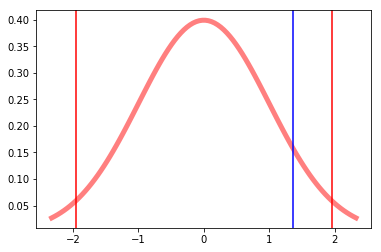

In [8]:
# Essa função recebe como parâmetros: o valor observado, o valor crítico negativo e positivo e o tipo do valor (z ou t)
teste_bilateral(z, z_critico_neg, z_critico_pos, 'z')

Em ambos os testes, tivemos um P valor maior do que o alfa (0.47 > 0.05), portanto, aceitamos a hipótese nula. 

## Problema 2: testando a média de altura de uma população 

Primeiro carregamos os dados da amostra

In [9]:
# amostra aleatória
amostra = np.array([1.29976537, 1.50109149, 1.59373572, 1.27249487, 1.25013404,
       1.92579941, 1.69810155, 1.72480802, 1.84590793, 1.72106438,
       1.72887568, 1.28914892, 1.75082407, 1.49982705, 1.40517243,
       1.73586983, 1.54208646, 1.97052236, 1.48861552, 1.96731456,
       1.23813259, 1.30686525, 1.5376283 , 1.27748465, 1.66483155,
       1.43316223, 1.30570199, 1.59033091, 1.74470394, 1.43655501,
       1.96172667, 1.22231744, 1.75068466, 1.21907808, 1.94254254,
       1.35767019, 1.8250525 , 1.97689053, 1.90396933, 1.57675201,
       1.35707761, 1.64350921, 1.97027864, 1.57140672, 1.22954647,
       1.73268708, 1.21620466, 1.71626002, 1.78190467, 1.67269229])

Vamos testar a hipótese de que a média de altura dessa população é maior ou igual a 1,55 metros.

Portanto, temos que:

- H0 >= 1.55
- H1 < 1.55

Vamos definir também um nível de sigificância de 5% (0.05)

Então computamos o valor observado. Nesse caso, teremos o <strong>T</strong> ao invés do Z, uma vez que nesse problema não conhecemos a variância da população. Sendo assim, precisaremos substituir no cálculo do valor observado o desvio padrão da população pelo desvio padrão da amostra, tendo assim a fórmula: <em>Média amostral - H0 / (Desvio Padrão da amostra / raiz(tamanho da amostra))</em>

In [10]:
# cálculo das variáveis necessárias para obter o T observado
media_amostra = np.mean(amostra)
H0 = 1.55
desvio_padrao = np.std(amostra)
n = len(amostra)

In [11]:
# obtem o T observado 
t_obs = (media_amostra - H0)/(desvio_padrao/math.sqrt(n))
t_obs

1.088658758410284

Agora utilizaremos uma outra função do pacote do <em>stats</em> para computar o t crítico, que nesse caso é apenas um valor, tornando nosso teste unilateral.

Um detalhe no cálculo do t crítico, é que ele exige definirmos os graus de liberdade, que são calculados subtraindo 1 do número de valores da amostra (n-1)

In [12]:
# Importa o módulo T
from scipy.stats import t

In [13]:
# computamos o grau de liberdade subtraindo 1 do tamanho da amostra
grau_liberdade = n-1

In [14]:
# chama a função ppf do módulo T e passamos como argumento o nível de significância e o grau de liberdade  e retorna o t crítico
t_critico = st.t.ppf((.05), df=grau_liberdade)
t_critico

-1.6765508919142635

Usaremos outra função, para testes unilaterais, que gera a distribuição T de Student com as regiões críticas e valor observado. Nela declaramos o valor observado, o valor crítico e o tipo do valor (z ou t)

In [15]:
# função teste_unilateral
def teste_unilateral(v_obs, v_critico, distribuicao):
    
    """
    Parâmetros:
    v_obs: valor observado (float ou int)
    v_critico: z crítico ou t crítico (float ou int)
    distribuicao: Z ou T de Student, determina a estatística utilizada (string, 'z' ou 't')
    """
    
    if distribuicao == 'z':        
        fig, ax = plt.subplots(1, 1)
        mean, var, skew, kurt = norm.stats(moments='mvsk')
        x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
        ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.5, label='norm pdf')
    
    if distribuicao == 't':
        fig, ax = plt.subplots(1, 1)
        df = 2.74
        mean, var, skew, kurt = t.stats(df, moments='mvsk')
        x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 100) 
        ax.plot(x, t.pdf(x, df), 'r-', lw=5, alpha=0.5, label='t pdf')

    plt.axvline(x=v_critico, color='red')
    plt.axvline(x=v_obs, color='blue')
    
    if (v_critico > 0 and v_obs >= v_critico) or (v_critico < 0 and v_obs <= v_critico):
        print('O valor observado está dentro da região crítica')
    
    else:
        print('O valor observado está fora da região crítica')

O valor observado está fora da região crítica


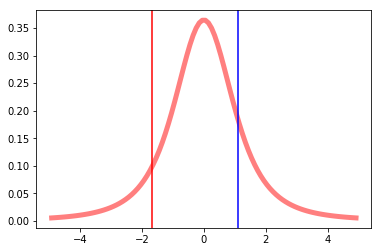

In [16]:
# chamando a função
teste_unilateral(t_obs, t_critico, 't')

## Exercício 


- Carregue os dados <strong>amostra aleatoria.csv</strong>.
- Eles representam uma amostra aleatória de uma cidade.

1) Teste a hipótese de que mulheres representam 55% da população com um nível de significancia de 5%

### Formulando hipóteses:

- H0: p # Complete
- HA: p # Complete 

#### A hipótese nula deve ser aceita?